In [1]:
#!pip install scikit-network --user

In [2]:
import networkx as nx
import numpy as np

In [3]:
# for visualization
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

In [4]:
G = nx.les_miserables_graph()
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

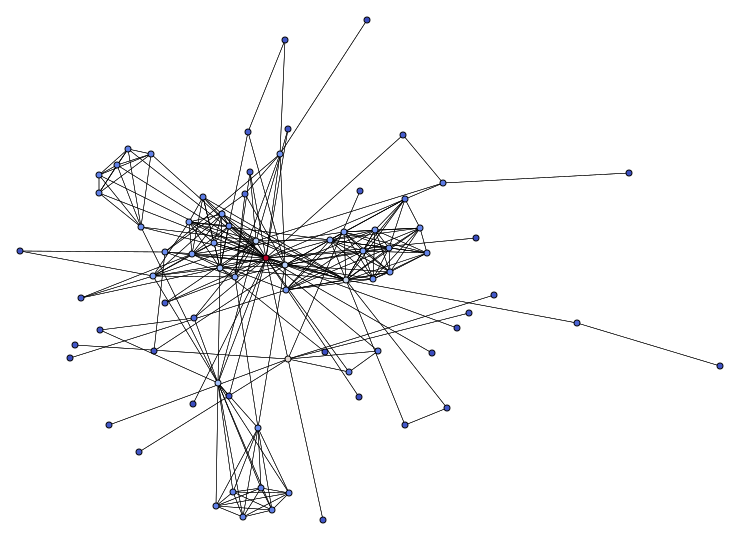

In [5]:
# this is a network / graph

draw_graph(G, node_size=3)

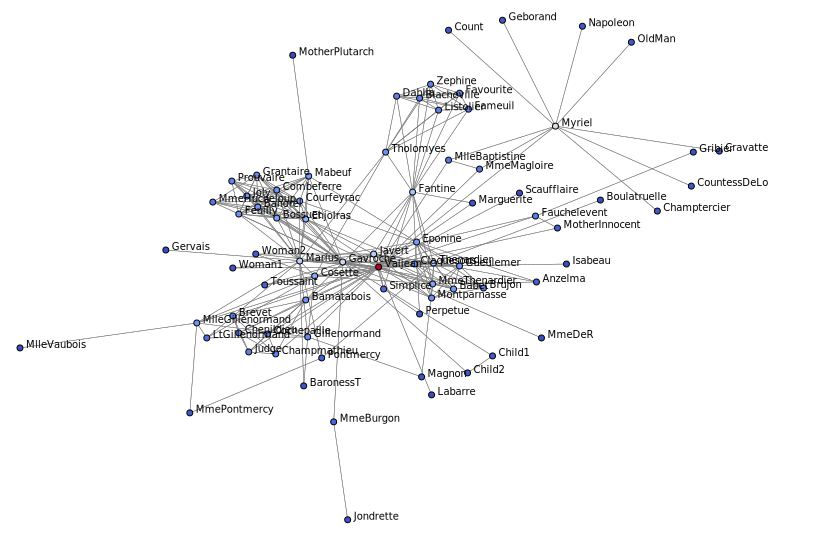

In [6]:
# with labels

draw_graph(G, node_size=3, show_names=True)

In [7]:
# these are ten of the nodes

sorted(G.nodes)[0:10]

['Anzelma',
 'Babet',
 'Bahorel',
 'Bamatabois',
 'BaronessT',
 'Blacheville',
 'Bossuet',
 'Boulatruelle',
 'Brevet',
 'Brujon']

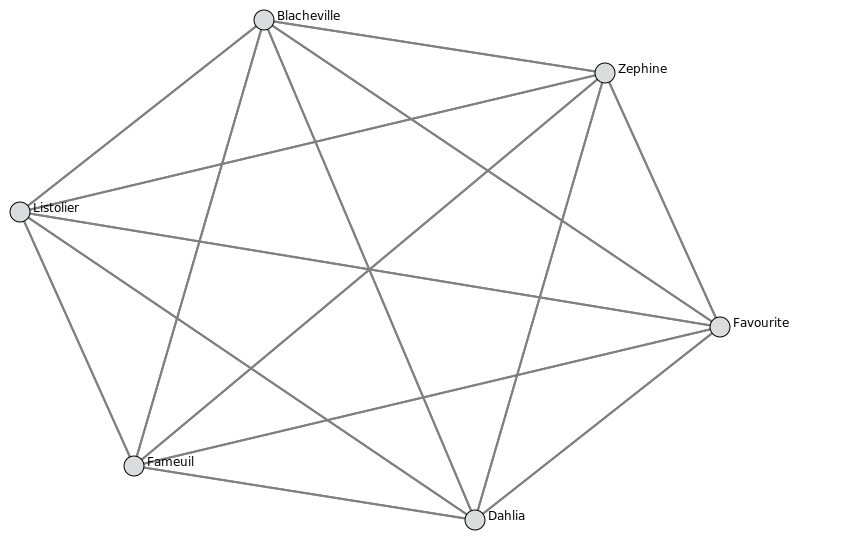

In [8]:
subgraph_nodes = ['Dahlia', 'Favourite', 'Listolier', 'Fameuil', 'Zephine', 'Blacheville']

G_sub = G.subgraph(subgraph_nodes)

draw_graph(G_sub, node_size=10, font_size=12, edge_width=2, show_names=True)